In [14]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_all_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [15]:
data

['t_n55          7.9932 ( 7.5762,  8.3134) ( 7.6287,  8.3338)  0.7051 (Jnode 106)\n',
 't_n56          7.6263 ( 7.3722,  7.9100) ( 7.3739,  7.9113)  0.5373 (Jnode 105)\n',
 't_n57          7.1155 ( 6.9593,  7.2839) ( 6.9620,  7.2861)  0.3241 (Jnode 104)\n',
 't_n58          6.6276 ( 6.5379,  6.7214) ( 6.5364,  6.7194)  0.1830 (Jnode 103)\n',
 't_n59          6.4291 ( 6.3420,  6.5259) ( 6.3375,  6.5203)  0.1828 (Jnode 102)\n',
 't_n60          6.1799 ( 6.0573,  6.3002) ( 6.0618,  6.3039)  0.2421 (Jnode 101)\n',
 't_n61          5.8624 ( 5.7018,  6.0169) ( 5.7052,  6.0195)  0.3142 (Jnode 100)\n',
 't_n62          3.2526 ( 2.6694,  3.6758) ( 2.7127,  3.7092)  0.9965 (Jnode 99)\n',
 't_n63          4.9234 ( 4.7688,  5.0961) ( 4.7669,  5.0934)  0.3266 (Jnode 98)\n',
 't_n64          4.3953 ( 4.3296,  4.4804) ( 4.3255,  4.4737)  0.1482 (Jnode 97)\n',
 't_n65          4.2234 ( 4.2071,  4.2688) ( 4.2061,  4.2580)  0.0519 (Jnode 96)\n',
 't_n66          3.4932 ( 3.4445,  3.5173) ( 3.4518,  3.52

In [16]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [17]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [18]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [19]:
posterior_mean_iqtree

[7.9932,
 7.6263,
 7.1155,
 6.6276,
 6.4291,
 6.1799,
 5.8624,
 3.2526,
 4.9234,
 4.3953,
 4.2234,
 3.4932,
 3.1951,
 1.7126,
 0.6339,
 3.8451,
 6.2839,
 6.0622,
 5.8765,
 4.2051,
 3.7762,
 5.0709,
 6.355,
 6.153,
 5.9831,
 5.7406,
 5.456,
 5.3213,
 5.1527,
 4.9961,
 4.5825,
 3.4869,
 3.2451,
 5.0186,
 4.2696,
 6.2403,
 1.7502,
 6.1244,
 5.8446,
 5.4766,
 5.3129,
 3.7777,
 4.7512,
 4.9734,
 4.7796,
 4.463,
 3.3311,
 4.5873,
 6.1617,
 3.7841,
 2.1502,
 2.4969,
 5.174]

In [20]:
lower_ci_iqtree

[7.5762,
 7.3722,
 6.9593,
 6.5379,
 6.342,
 6.0573,
 5.7018,
 2.6694,
 4.7688,
 4.3296,
 4.2071,
 3.4445,
 3.1803,
 1.6503,
 0.615,
 3.5971,
 6.1792,
 5.8204,
 5.7323,
 3.5724,
 3.1866,
 5.0441,
 6.2831,
 6.0634,
 5.8839,
 5.6484,
 5.3955,
 5.3013,
 5.1403,
 4.9898,
 4.3651,
 3.2684,
 3.063,
 4.976,
 4.1629,
 6.1535,
 1.2811,
 6.0313,
 5.7533,
 5.4401,
 5.3002,
 3.2023,
 4.7029,
 4.7744,
 4.5363,
 4.1894,
 2.84,
 4.154,
 5.8195,
 3.1853,
 1.6815,
 1.9165,
 4.2246]

In [21]:
upper_ci_iqtree

[8.3134,
 7.91,
 7.2839,
 6.7214,
 6.5259,
 6.3002,
 6.0169,
 3.6758,
 5.0961,
 4.4804,
 4.2688,
 3.5173,
 3.2329,
 1.8858,
 0.6866,
 4.2065,
 6.3797,
 6.233,
 6.0183,
 4.7632,
 4.3648,
 5.143,
 6.4246,
 6.241,
 6.0828,
 5.8391,
 5.5285,
 5.353,
 5.1783,
 5.0125,
 4.7457,
 3.7764,
 3.5435,
 5.1101,
 4.4746,
 6.3217,
 2.167,
 6.2099,
 5.9384,
 5.4979,
 5.3429,
 4.3483,
 4.8584,
 5.242,
 5.0589,
 4.803,
 3.7553,
 5.0413,
 6.3715,
 4.5233,
 2.8348,
 3.2731,
 6.2148]

In [22]:
file_LG = open("LG_all_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

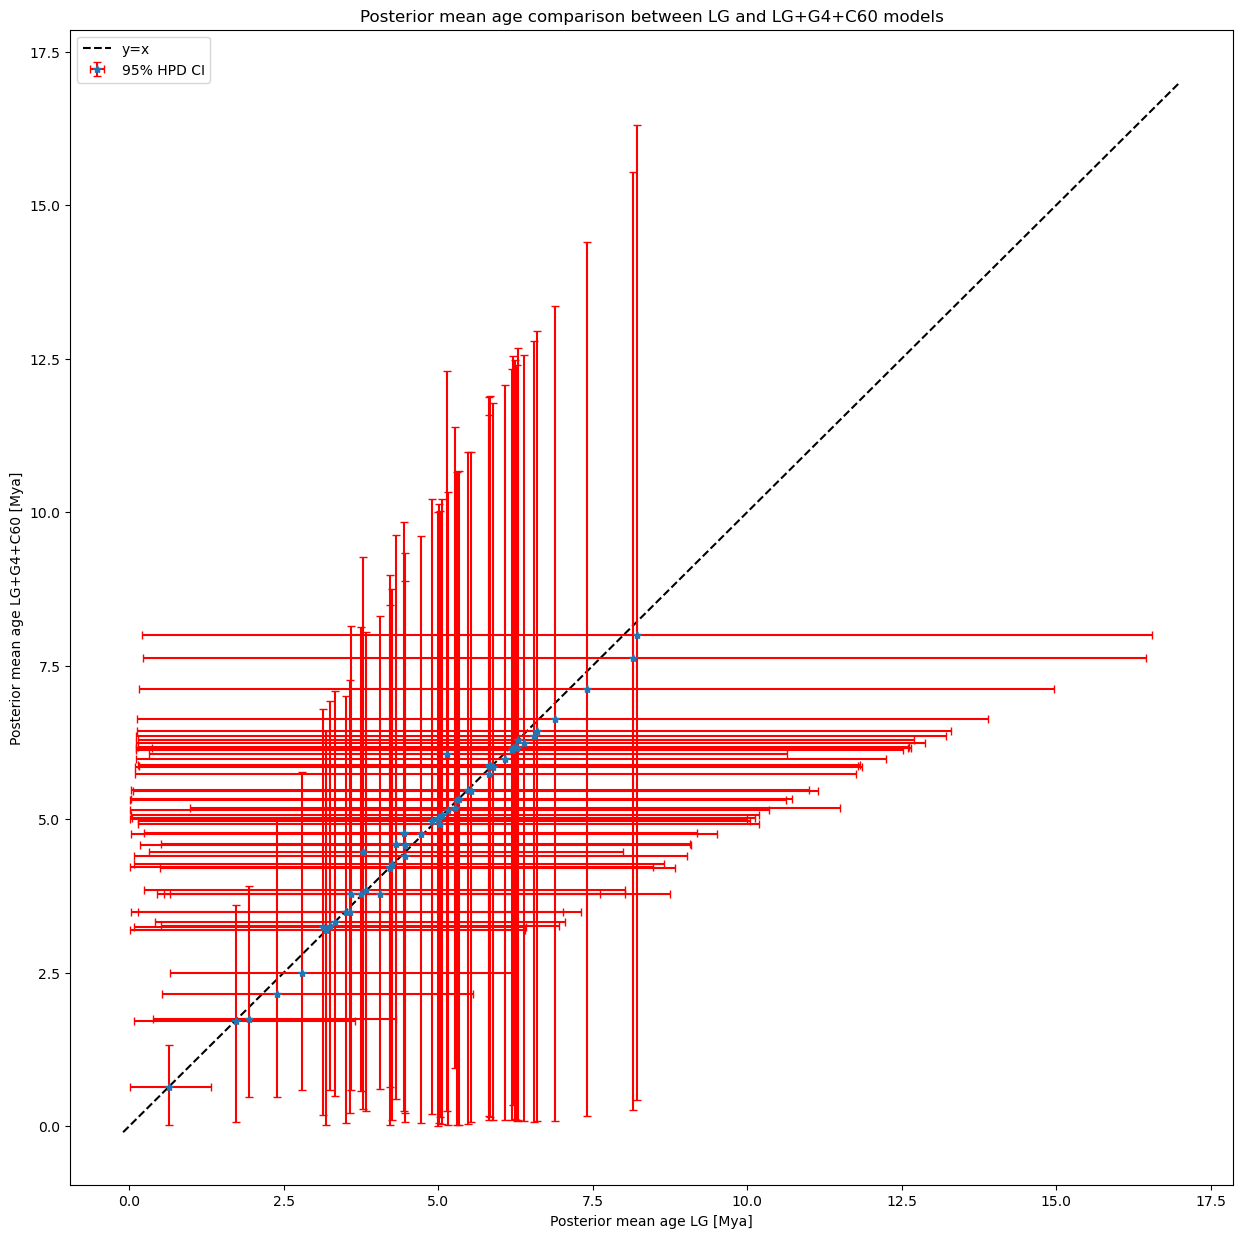

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C60 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 models')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C60.png')

In [24]:
posterior_mean_baseml

[8.2224,
 8.1524,
 7.4044,
 6.8937,
 6.5909,
 6.2488,
 5.8214,
 3.2549,
 5.0197,
 4.4689,
 4.221,
 3.5,
 3.1903,
 1.727,
 0.6345,
 3.8303,
 6.2925,
 5.1454,
 5.8402,
 4.2228,
 3.594,
 5.0662,
 6.5557,
 6.2734,
 6.0718,
 5.8268,
 5.5345,
 5.3361,
 5.158,
 4.994,
 4.4682,
 3.572,
 3.1273,
 5.019,
 4.2434,
 6.3827,
 1.9353,
 6.2001,
 5.8811,
 5.4869,
 5.3069,
 3.7469,
 4.7264,
 4.9017,
 4.4422,
 3.7769,
 3.3239,
 4.313,
 6.206,
 4.0587,
 2.3943,
 2.7985,
 5.273]

In [25]:
posterior_mean_iqtree

[7.9932,
 7.6263,
 7.1155,
 6.6276,
 6.4291,
 6.1799,
 5.8624,
 3.2526,
 4.9234,
 4.3953,
 4.2234,
 3.4932,
 3.1951,
 1.7126,
 0.6339,
 3.8451,
 6.2839,
 6.0622,
 5.8765,
 4.2051,
 3.7762,
 5.0709,
 6.355,
 6.153,
 5.9831,
 5.7406,
 5.456,
 5.3213,
 5.1527,
 4.9961,
 4.5825,
 3.4869,
 3.2451,
 5.0186,
 4.2696,
 6.2403,
 1.7502,
 6.1244,
 5.8446,
 5.4766,
 5.3129,
 3.7777,
 4.7512,
 4.9734,
 4.7796,
 4.463,
 3.3311,
 4.5873,
 6.1617,
 3.7841,
 2.1502,
 2.4969,
 5.174]

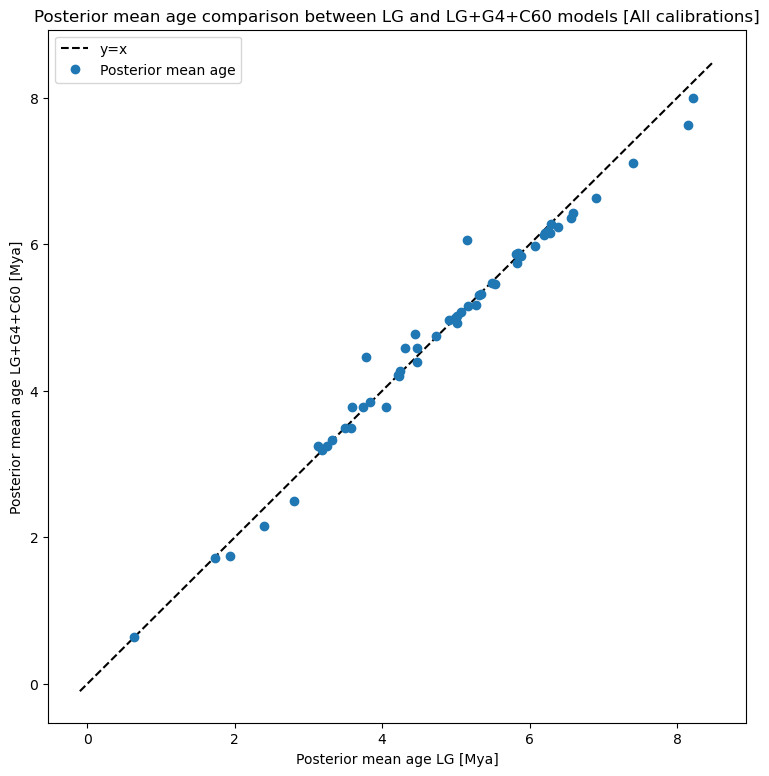

In [26]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot([-0.1,8.5], 
        [-0.1, 8.5], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C60 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 models [All calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C60_scatter.png')